In [33]:
import os
from PIL import Image

image_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET/TRAIN"
output_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET/TRAIN2"  # Directory to save resized images
desired_size = (224, 224)
desired_size2 = (224, 224)


os.makedirs(output_dir, exist_ok=True)


for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"): 

        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)


        img = img.resize(desired_size2)
        img = img.convert("RGB")
       

        output_path = os.path.join(output_dir, filename)
        img.save(output_path)

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"): 

        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)


        img = img.resize(desired_size)

        

        img.save(os.path.join(image_dir, filename))



In [34]:
image_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET/TEST"

desired_size = (224, 224) 


for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):  
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)

        img = img.resize(desired_size)
        img = img.convert("RGB")

        img.save(os.path.join(image_dir, filename))

In [35]:

import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.transforms import transforms
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.labels_map = {
            "O": 0,  # Organic
            "R": 1   # Recycle
        }
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith(".jpg")]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path)
        label = self.labels_map[img_name[0]]  

        if self.transform:
            image = self.transform(image)

        return image, label


root_dir = "/Users/prishamarpu/Documents/GitHub/waste-classification/DATASET"

transformers=transforms.Compose({
    transforms.Resize((32,32)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    #transforms.Normalize([0.5,0.5,0.5,],[0.5,0.5,0.5,])
})

train_dataset = CustomDataset(root_dir=root_dir + "/TRAIN", transform=transformers)
train2_dataset = CustomDataset(root_dir=root_dir + "/TRAIN2", transform=transformers)
train3_dataset = CustomDataset(root_dir=root_dir + "/TRAIN3", transform=transformers)
test_dataset = CustomDataset(root_dir=root_dir + "/TEST", transform=transformers)

train3_loader = DataLoader(train3_dataset, batch_size=64, shuffle=True)
train2_loader = DataLoader(train2_dataset, batch_size=64, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

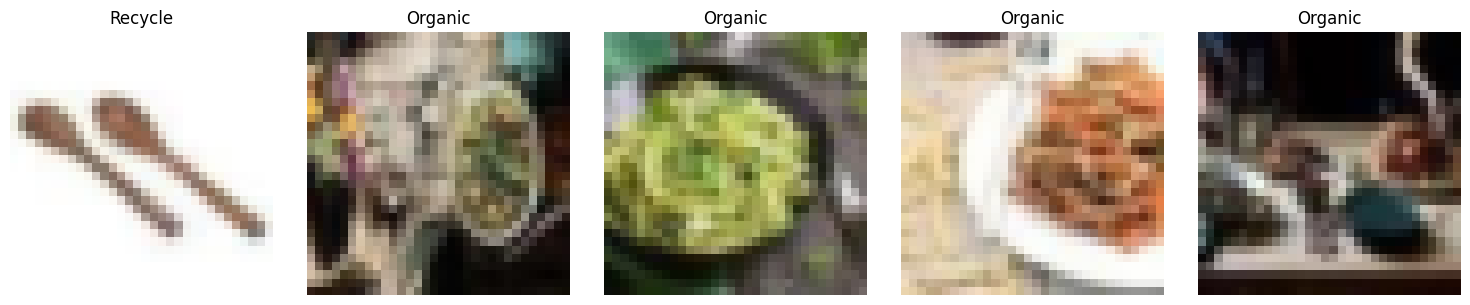

In [37]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import random



labels_map = {
    0: "Organic",
    1: "Recycle"
}

num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))

for i in range(num_images_to_plot):
    train_features, train_labels = next(iter(train_loader))

    index = random.randrange(len(train_features))
    img = train_features[index] 
    label_index = train_labels[index].item()
    label = labels_map[label_index]

    img = transforms.functional.to_pil_image(img) 
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()



Feature batch shape: torch.Size([4, 3, 150, 150])
Labels batch shape: torch.Size([4])


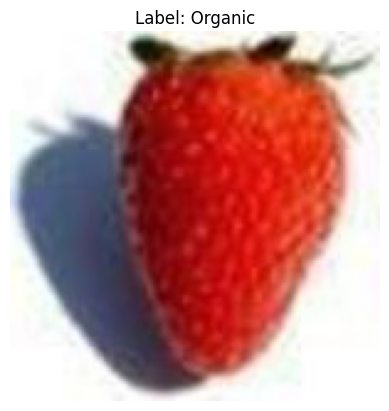

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 0.9898, 0.9793, 0.9706],
          [1.0000, 1.0000, 1.0000,  ..., 0.9914, 0.9859, 0.9793],
          [1.0000, 1.0000, 1.0000,  ..., 0.9919, 0.9928, 0.9899],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 0.9898, 0.9793, 0.9706],
          [1.0000, 1.0000, 1.0000,  ..., 0.9914, 0.9859, 0.9793],
          [1.0000, 1.0000, 1.0000,  ..., 0.9919, 0.9928, 0.9899],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 0.9898, 0.9793, 0.9706],
          [1.0000, 1.0000, 1.0000,  ..., 0.9914, 0.9859, 0.9793],
          [1.0000, 1.0000, 1.0000,  ..., 0

In [23]:
train_features, train_labels = next(iter(train3_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].numpy().transpose((1, 2, 0)) 
label = train_labels[0]


plt.imshow(img)
plt.axis('off')
if label==0:
    plt.title(f"Label: Organic")
else:
    plt.title(f"Label: Recycle")
plt.show()

print(train_features)

Feature batch shape: torch.Size([64, 3, 150, 150])
Labels batch shape: torch.Size([64])
(150, 150, 3)


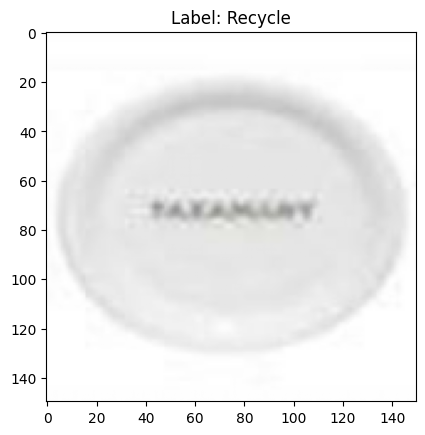

In [24]:
train2_features, train2_labels = next(iter(train2_loader))


img2 = train2_features[0].numpy().transpose((1, 2, 0))  
label2 = train2_labels[0]

print(f"Feature batch shape: {train2_features.size()}")
print(f"Labels batch shape: {train2_labels.size()}")
print(img2.shape)
plt.imshow(img2)
if label2==0:
    plt.title(f"Label: Organic")
else:
    plt.title(f"Label: Recycle")
plt.show()







In [12]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.optim import Adam
from torch.autograd import Variable

In [13]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [26]:
class ConvNet(nn.Module):
    def __init__(self, num_classes = 2):
        super(ConvNet, self).__init__()

        #(64,3,150,150) 
        # self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1) #(64,12,150,150)
        # self.bn1 = nn.BatchNorm2d(num_features=12) #(64,12,150,150)
        # self.relu1 = nn.ReLU() #(64,12,150,150)
        # self.pool = nn.MaxPool2d(kernel_size=2) #(64,12,75,75)

        # self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1) #(64,20,75,75)
        # self.relu2 = nn.ReLU() #(64,20,75,75)

        # self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=3, stride=1, padding=1) #(64,32,75,75)
        # self.bn3 = nn.BatchNorm2d(num_features=32) #(64,32,75,75)
        # self.relu3 = nn.ReLU() #(64,32,75,75)

        # self.fc = nn.Linear(in_features=32*75*75, out_features=2)

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1) #(64,12,150,150)
        self.bn1 = nn.BatchNorm2d(num_features=12) #(64,12,150,150)
        self.relu1 = nn.ReLU() #(64,12,150,150)
        self.pool = nn.MaxPool2d(kernel_size=2) #(64,12,75,75)

        self.conv3 = nn.Conv2d(in_channels=12, out_channels=32, kernel_size=3, stride=1, padding=1) #(64,32,75,75)
        self.bn3 = nn.BatchNorm2d(num_features=32) #(64,32,75,75)
        self.relu3 = nn.ReLU() #(64,32,75,75)

        self.fc = nn.Linear(in_features=32*16*16, out_features=2)

    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)
        output = self.pool(output)

        #output = self.conv2(output)
        #output = self.relu2(output)
        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)

        output = output.view(-1,32*16*16)
        output = self.fc(output)
        return output


In [27]:
model1 = ConvNet(num_classes=2).to(device)
model1 = model1.to('cpu')
print(model1)

for name, param in model1.named_parameters():
    print(f"Parameter name: {name}, dtype: {param.dtype}")

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=8192, out_features=2, bias=True)
)
Parameter name: conv1.weight, dtype: torch.float32
Parameter name: conv1.bias, dtype: torch.float32
Parameter name: bn1.weight, dtype: torch.float32
Parameter name: bn1.bias, dtype: torch.float32
Parameter name: conv3.weight, dtype: torch.float32
Parameter name: conv3.bias, dtype: torch.float32
Parameter name: bn3.weight, dtype: torch.float32
Parameter name: bn3.bias, dtype: torch.float32
Parameter name: fc.weight, dtype: torch.float32
Parameter name: fc.bias, dtype: torch

In [28]:
optimizer = Adam(model1.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.CrossEntropyLoss()

num_epoches = 5

train2_count=len(train2_loader.dataset)
test_count=len(test_loader.dataset)

print(train2_count, test_count)

22546 2513


In [29]:
best_accuracy = 0.0

for epoch in range(num_epoches):
    model1.train()
    train_accuracy = 0.0
    train_loss = 0.0

    for i, (images, labels) in enumerate(train2_loader):
        if images.dtype != torch.float32:
            images = images.to(torch.double) 
        labels = labels.long() 

        if torch.cuda.is_available():
            images, labels = images.cuda(), labels.cuda()
        
        optimizer.zero_grad()

        outputs = model1(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        prediction = torch.max(outputs.data, 1)[1]
        accuracy_tensor = torch.eq(prediction, labels.data).type(torch.float)
        train_accuracy += int(torch.sum(accuracy_tensor))


    train_accuracy = train_accuracy / train2_count
    train_loss = train_loss / train2_count

    model1.eval()
    test_accuracy = 0.0
    
    for i, (images, labels) in enumerate(test_loader):
        if images.dtype != torch.float32:
            images = images.to(torch.double) 
        labels = labels.long() 
        if torch.cuda.is_available():
            images, labels = images.cuda(), labels.cuda()
            
        optimizer.zero_grad()

        outputs = model1(images)
        optimizer.step()
        prediction = torch.max(outputs.data, 1)[1]
        accuracy_tensor = torch.eq(prediction, labels.data).type(torch.float)
        test_accuracy += int(torch.sum(accuracy_tensor))


    test_accuracy = test_accuracy / test_count



    print("Epoch: " + str(epoch) + " Train Loss: " + str((train_loss)) + " Train Accuracy: " + str(train_accuracy)+ " Test Accuracy: " + str(test_accuracy))

    if test_accuracy > best_accuracy:
        torch.save(model1.state_dict(), 'best_checkpoint.model')
        best_accuracy = test_accuracy



Epoch: 0 Train Loss: 0.48357226810163034 Train Accuracy: 0.7913155326887252 Test Accuracy: 0.8372463191404695
Epoch: 1 Train Loss: 0.41202389273934936 Train Accuracy: 0.8209438481327065 Test Accuracy: 0.8909669717469161
Epoch: 2 Train Loss: 0.3897292411000602 Train Accuracy: 0.8298589550252816 Test Accuracy: 0.8475925189017111
Epoch: 3 Train Loss: 0.36964899202919277 Train Accuracy: 0.8429876696531535 Test Accuracy: 0.8563469956227616
Epoch: 4 Train Loss: 0.359119609832383 Train Accuracy: 0.8450722966379846 Test Accuracy: 0.8905690409868683
